# 线性回归模型预测血糖数据

In [1]:
# 导入包
import scipy.io as scio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

## 读取数据

数据格式为mat文件，其中`PPP`标签为和血糖相关的系数，暂时不明了具体是哪些系数，而`TTT`则是表示着对应的血糖，提取的数据如下所示，数据量较小，仅有205组数据

In [2]:
# file_name = "data.mat"
# data = scio.loadmat(file_name)
# X = data.get("PPP")
# X = X.T
# y = data.get("TTT")
# y = y[0]

In [3]:
filename = "Datasets/DynamicBloodGlucoseData.csv"
with open(filename, encoding='utf-8') as f:
    data = np.loadtxt(f,delimiter=",",skiprows=1)

In [4]:
X = data[:,0:3:2]
y = data[:,1].reshape(len(data),1)
X = (X-X.mean(0))/X.std(0)

In [5]:
# 确认X和y数据第一维一致
print("X.shape :", X.shape, " y.shape: ", y.shape)

X.shape : (4793, 2)  y.shape:  (4793, 1)


In [6]:
type(X)

numpy.ndarray

In [7]:
type(y)

numpy.ndarray

In [8]:
X[1:10,:]

array([[-3.23390023, -2.03429669],
       [-2.43108325, -1.72970544],
       [-2.43000032, -1.72898287],
       [-2.42927836, -1.7282603 ],
       [-2.4285564 , -1.72753773],
       [-2.42314172, -1.72681516],
       [-2.42205878, -1.7260926 ],
       [-2.42133682, -1.72464746],
       [-2.42097585, -1.72537003]])

In [9]:
y[1:10]

array([[12. ],
       [12.4],
       [12.4],
       [12.4],
       [12.4],
       [12.4],
       [12.4],
       [12.5],
       [12.5]])

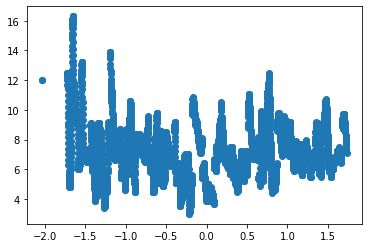

In [10]:
plt.scatter(X[:,1],y)
plt.show()

## 创建测试集

再确认数据格式无误后，可以将数据集分为训练数据集和测试数据集


In [11]:
# 根据比例划分数据集为训练集和测试集
def split_train_test(X, y, test_ratio):
    shuffled_indices = np.random.permutation(len(y))
    test_set_size = int(len(y) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return X[train_indices,:], y[train_indices], X[test_indices,:], y[test_indices]

In [12]:
# 分割得到训练集和测试集
train_X, train_y, test_X, test_y = split_train_test(X, y, 0.4)

In [13]:
train_X.shape, train_y.shape,test_X.shape, test_y.shape

((2876, 2), (2876, 1), (1917, 2), (1917, 1))

## 训练数据集

这里选择简单的线性回归模型，采用梯度下降的方法训练数据

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_X, train_y)

LinearRegression()

以上就是简单的线性回归训练，从原始数据中，随机挑选几个数据检验模型的预测效果

In [15]:
some_data = X[120:125]
some_labels = y[120:125]
print('Predictions:', lin_reg.predict(some_data))

Predictions: [[8.77878862]
 [8.78220951]
 [8.78003087]
 [8.78205187]
 [8.78329412]]


In [16]:
print("Labels:",list(some_labels))

Labels: [array([11.5]), array([11.2]), array([11.2]), array([11.1]), array([11.])]


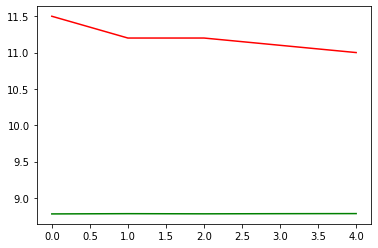

In [17]:
plt.plot(range(5), some_labels, c='r')
plt.plot(range(5), lin_reg.predict(some_data), c='g')
plt.show()

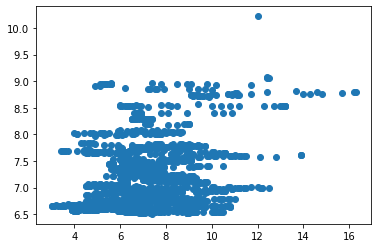

In [18]:
predict_y = lin_reg.predict(test_X)
plt.scatter(test_y,predict_y)
plt.show()

In [19]:
# clarke网格误差分析
def clarke(y,y_predicted):
    """
    clarke网格分析

    total, percentage = clarke(y, yp)
    
    INPUTS:
    y       Reference values(血糖浓度参考值)
    yp      Predicted/estimated values(血糖预测值)
    
    OUTPUTS:

    """
    # 设置坐标轴范围和坐标轴名称
    plt.xlim(0, 400*0.0556)
    plt.ylim(0, 400*0.0556)
    plt.xlabel('Reference values of Blood Glucose(mmol/L)')
    plt.ylabel('Predicted values of Blood Glucose(mmol/L)')
    # 获取数据长度
    n = len(y)
    # 散点图绘制数据
    plt.scatter(y, y_predicted, s=15)
    # 绘制网线
    # 上半区网线
    plt.plot([0,400*0.0556],[0,400*0.0556],linestyle=':',c='k') 
    plt.plot([0,175*0.0556/3],[70*0.0556,70*0.0556],c='k',linewidth=1)
    plt.plot([175*0.0556/3,400*0.0556/1.2],[70*0.0556,400*0.0556],c='k',linewidth=1)
    plt.plot([70*0.0556,70*0.0556],[84*0.0556,400*0.0556],c='k', linewidth=1)
    plt.plot([0,70*0.0556],[180*0.0556,180*0.0556],c='k',linewidth=1)
    plt.plot([70*0.0556,290*0.0556],[180*0.0556,400*0.0556],c='k', linewidth=1)
    # 下半区网线绘制
    plt.plot([70*0.0556,70*0.0556],[0,56*0.0556],c='k',linewidth=1)
    plt.plot([70*0.0556,400*0.0556],[56*0.0556,320*0.0556],c='k',linewidth=1)
    plt.plot([180*0.0556,180*0.0556],[0,70*0.0556],c='k',linewidth=1)
    plt.plot([180*0.0556,400*0.0556],[70*0.0556,70*0.0556],c='k',linewidth=1)
    plt.plot([240*0.0556,240*0.0556],[70*0.0556,180*0.0556],c='k',linewidth=1)
    plt.plot([240*0.0556,400*0.0556],[180*0.0556,180*0.0556],c='k',linewidth=1)
    plt.plot([130*0.0556,180*0.0556],[0,70*0.0556],c='k',linewidth=1)
    
    # 绘制区域标签A,B,C,D,E
    plt.text(30*0.0556,20*0.0556,'A',fontsize=9);
    plt.text(30*0.0556,150*0.0556,'D',fontsize=9);
    plt.text(30*0.0556,380*0.0556,'E',fontsize=9);
    plt.text(150*0.0556,380*0.0556,'C',fontsize=9);
    plt.text(160*0.0556,20*0.0556,'C',fontsize=9);
    plt.text(380*0.0556,20*0.0556,'E',fontsize=9);
    plt.text(380*0.0556,120*0.0556,'D',fontsize=9);
    plt.text(380*0.0556,260*0.0556,'B',fontsize=9);
    plt.text(280*0.0556,380*0.0556,'B',fontsize=9);

    # 计算数据
    total = np.zeros(5)
    # A区域
    for i in range(0,n):
        if (y[i] <= 70*0.0556 and y_predicted[i] <= 70*0.0556) or (y_predicted[i] <= 1.2*y[i] and y_predicted[i] >= 0.8*y[i]): 
            total[0] = total[0] + 1
        else:
            # E区域
            if(y[i] >= 180*0.0556 and y_predicted[i] <= 70*0.0556) or (y[i] <= 70*0.0556 and y_predicted[i] >= 180*0.0556):
                total[4] = total[4] + 1
            else:
                # 区域C
                if (y[i] >= 70*0.0556 and y[i] <= 290*0.0556) and (y_predicted[i] >= y[i] + 110*0.0556) or (y[i] >= 130*0.0556 and y[i] <= 180*0.0556) and (y_predicted[i] <= (7/5)*y[i] - 182*0.0556):
                    total[2] = total[2] + 1
                else:
                    # 区域D
                    if (y[i] >= 240*0.0556) and (y_predicted[i] >= 70*0.0556) and (y_predicted[i] <= 180*0.0556) or (y[i] <= 175*0.0556/3 and y_predicted[i] <= 180*0.0556) and (y_predicted[i] >= 70*0.0556) or (y[i] >= 175*0.0556/3 and y[i] <= 70*0.0556) and (y_predicted[i] >= (6/5)*y[i]):
                        total[3] = total[3] + 1
                    else:
                        # 区域B
                        total[1] = total[1] + 1

    percentage = (total/n)*100
    plt.show()
    return total, percentage

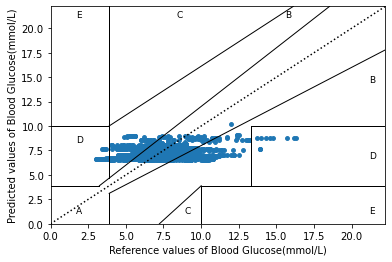

In [20]:
total, percentage = clarke(test_y, predict_y)

In [21]:
total

array([1189.,  691.,    0.,   37.,    0.])

数据点基本落入克拉克网络A,B区域，但是在B区域的点有点过多，准确率不是很高

In [22]:
percentage

array([62.02399583, 36.04590506,  0.        ,  1.93009911,  0.        ])

## 偏最小二乘回归实现

In [23]:
from sklearn.cross_decomposition import PLSRegression

pls2 = PLSRegression(n_components=2)
pls2.fit(train_X, train_y)
predict_y_pls2 = pls2.predict(test_X)

ValueError: Invalid number of components: 3

In [ ]:
total_pls2, percentage_pls2 = clarke(test_y, predict_y_pls2)

In [ ]:
total_pls2

In [ ]:
percentage_pls2